In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### 1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

* Screenshot of the .py file created:

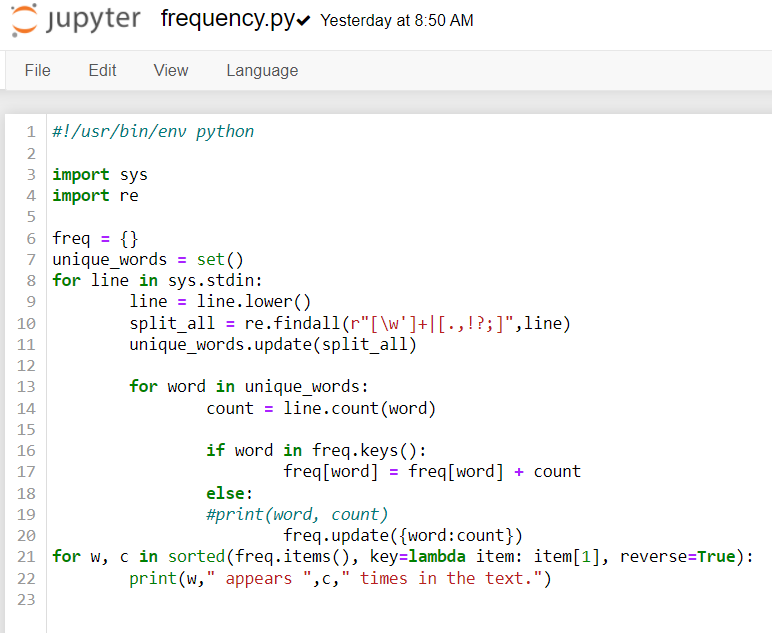

#### 2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

* Here is a screesnhot of the output

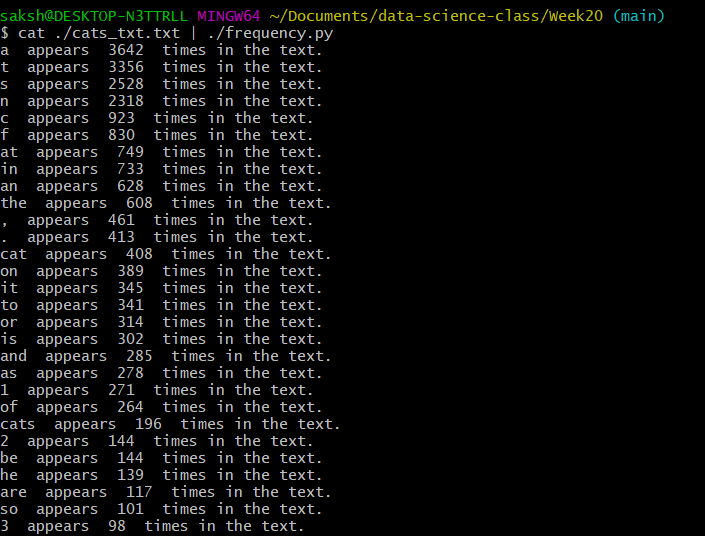

### In a Jupyter notebook: 
#### 3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization.

In [4]:
import nltk
from collections import Counter
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
paradise = nltk.corpus.gutenberg.words('milton-paradise.txt')
# Loaded tokenised file for Paradise Lost
paradise

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]

In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


import spacy
#loading the english language small model of spacy
en = spacy.load("en_core_web_sm")
sw_spacy = list(en.Defaults.stop_words)
old_eng_sw = ['thou','thee','thy','s','o','till','like','shall','hath']
sw = sw_spacy + old_eng_sw

# Filtering only words and excluding stop words
#sw = set(nltk.corpus.stopwords.words('english'))

paradise_filter = [w.lower() for w in paradise if not w.lower() in sw and w.isalpha()]

paradise_lem = [lemmatizer.lemmatize(w) for w in paradise_filter]

word_freq = Counter(paradise_lem)

word_freq.most_common(20)

[('heaven', 436),
 ('god', 316),
 ('earth', 217),
 ('man', 176),
 ('day', 157),
 ('high', 153),
 ('son', 132),
 ('far', 129),
 ('death', 127),
 ('power', 125),
 ('great', 123),
 ('world', 119),
 ('hell', 119),
 ('thing', 116),
 ('light', 116),
 ('angel', 111),
 ('stood', 110),
 ('night', 109),
 ('love', 106),
 ('good', 105)]

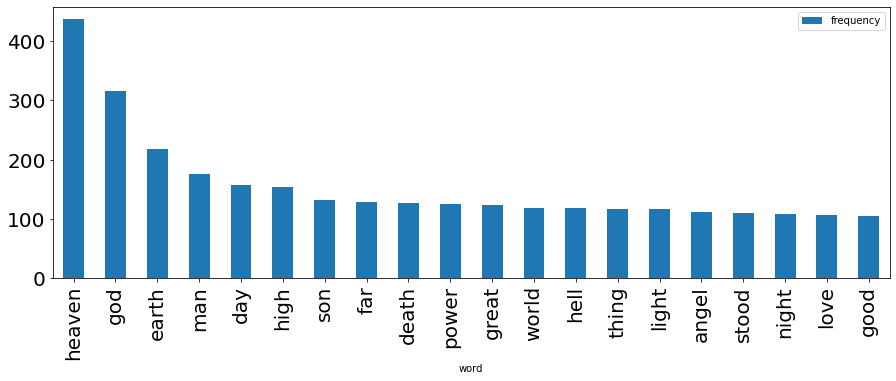

In [16]:
df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])
df.plot(kind='bar', x='word', figsize=(15,5), fontsize=20)
plt.show()

#### 4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

read = nltk.corpus.gutenberg.open('milton-paradise.txt')

sentiments = []

for line in read:
    sentiment = analyzer.polarity_scores(line)
    compound = sentiment["compound"]
    pos = sentiment['pos']
    neu = sentiment['neu']
    neg = sentiment['neg']

    sentiments.append({
                "text":line,
                "compound":compound,
                "positive":pos,
                "negative":neg,
                "neutral":neu
    })

sentiments_df = pd.DataFrame(sentiments)

print("TOP 5 POSITIVE SENTENCES")
sentiments_df.sort_values('positive',ascending=False)[['text','positive']].head()

TOP 5 POSITIVE SENTENCES


,text,positive
1571,"I pleased, and with attractive graces won \n",0.858
608,"Of dauntless courage, and considerate pride \n",0.855
7267,"She fair, divinely fair, fit love for Gods! \n",0.838
2211,"With joy and peace triumphing, and fair truth. \n",0.835
6299,"Intelligence of Heaven, Angel serene! \n",0.829


In [18]:
print("TOP 5 NEGATIVE SENTENCES")
sentiments_df.sort_values('negative',ascending=False)[['text','negative']].head()

TOP 5 NEGATIVE SENTENCES


,text,negative
5406,"Exhausted, spiritless, afflicted, fallen. \n",1.000
916,"Desperate revenge, and battle dangerous \n",0.919
510,"Exposed a matron, to avoid worse rape. \n",0.850
1305,O shame to men! Devil with devil damned \n,0.831
10381,"On penalty of death, and suffering death; \n",0.822


In [19]:
print("TOP 5 NEUTRAL SENTENCES")
sentiments_df.sort_values('neutral',ascending=False)[['text','neutral']].head()

TOP 5 NEUTRAL SENTENCES


,text,neutral
5317,Sat eagle-winged; beside him hung his bow \n,1.0
5762,Capacious bed of waters: Thither they \n,1.0
5777,"All but within those banks, where rivers now \n",1.0
5775,And on the washy oose deep channels wore; \n,1.0
5774,"With serpent errour wandering, found their way...",1.0


#### 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 

Vader Sentinmet Analysis quite accurately predicts sentences with postive, negative and neutral sentiment.

* For Postive sentiment sentences with words like 'pleased', 'courage', 'divinely', 'triumphing', 'Heaven' are chosen with high positive sentiment value. 

* For Negative sentiment sentences with words like 'spiritless', 'dangerous ', 'rape', 'Devil ', 'death' are chosen with high negative sentiment value. 

* For Neutral sentiment sentences with phrases like 'beside him hung', 'bed of waters:', 'where rivers', 'deep channels wore', 'wandering, found their way' are chosen with high neutral sentiment value. 

#### DataCamp's Intro to NLP

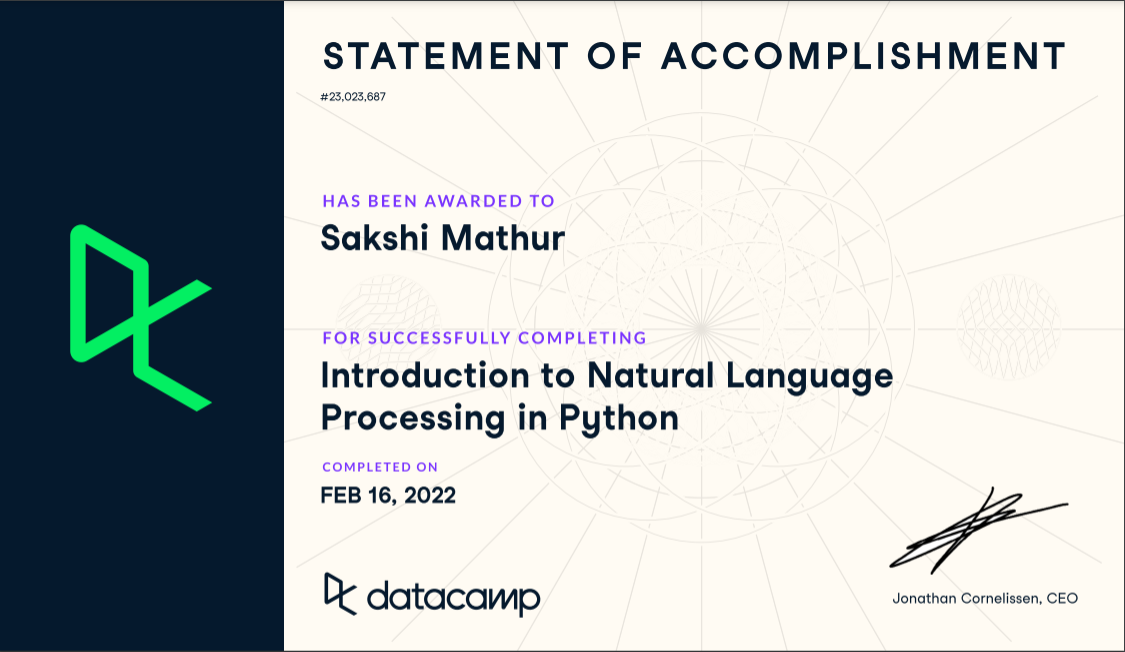